Objective 3. To identify key factors (e.g., commute, internet access, part-time work, etc.) influencing students' learning mode preference.

Research Question 3. What are the key factors affecting students' learning mode preference?

# **EDA**

Univariate analysis on single variable

examining the distribution of a single variable, which helps in understanding the underlying patterns or characteristics of the data. This analysis is typically used to summarize the data and check for outliers, central tendency, spread, and the shape of the data distribution. In this report, we will perform univariate analysis on both continuous and categorical variables to gain insights into their distributions.

# Selection of factors influencing students' learning mode preference


*  Commute time
*  Accomodation
*  Working
*  Hour Work
*  Current mode of learning
*  Internet access
*  Availability quiet space



# Insights

Based on the EDA, there are few key insights that have been observed:
1.   Most of the students commute to their university/college under 15mins.
2.   Most of the students are staying off campus.
3.   Most of the students are not working.
4.   Students' who are working spent more than 30 hours per week on their job.
5.   Most of the students are enjoying hybrid-in class blended study arrangement.
6.   Most of the students have good accessibility on the internet access.
7.   Most of the students have consistenly enjoy quiet space studying.



In [1]:
import pandas as pd
df = pd.read_csv('cleaned_df.csv')

In [3]:
from scipy import stats

# Chi Square

Chi square is known as a non parametric test and used a statistical test to determine whether categorical variables/factors are associate to each other.

In [4]:
# Example: commute time vs mode of studying
contingency_table = pd.crosstab(df['commute_time'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.03044297330837547


In [5]:
# Example: accommodation vs mode of studying
contingency_table = pd.crosstab(df['accommodation'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 9.363520304109531e-05


In [6]:
# Example: working vs mode of studying
contingency_table = pd.crosstab(df['working'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.0143719316076243


In [7]:
# Example: hours work vs mode of studying
contingency_table = pd.crosstab(df['hours_work'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.04382731473021429


In [8]:
import scipy.stats as stats

# Example: Internet access vs mode of studying
contingency_table = pd.crosstab(df['internet'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.4074814253605123


In [9]:
# Example: availability quiet space vs mode of studying
contingency_table = pd.crosstab(df['availability_quiet_space'], df['current_mode_of_learning'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.5220130489663397


In [10]:
#summarization

categorical_vars = ['internet', 'accommodation', 'working', 'availability_quiet_space', 'commute_time','hours_work']
for var in categorical_vars:
    print(f"\nChi-square test: {var} vs current_mode_of_learning")
    contingency = pd.crosstab(df[var], df['current_mode_of_learning'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    print(f"Chi2 = {chi2:.3f}, p = {p:.4f}")



Chi-square test: internet vs current_mode_of_learning
Chi2 = 6.142, p = 0.4075

Chi-square test: accommodation vs current_mode_of_learning
Chi2 = 18.552, p = 0.0001

Chi-square test: working vs current_mode_of_learning
Chi2 = 8.485, p = 0.0144

Chi-square test: availability_quiet_space vs current_mode_of_learning
Chi2 = 5.171, p = 0.5220

Chi-square test: commute_time vs current_mode_of_learning
Chi2 = 13.929, p = 0.0304

Chi-square test: hours_work vs current_mode_of_learning
Chi2 = 9.806, p = 0.0438


Based on the chi square results, there are strong evidence that accomodation type, working, commute time and hours of working affects students' mode learning preference. No evidence that internet access and availability of quiet space influence student's mode learning preference.

In [12]:
import matplotlib.pyplot as plt

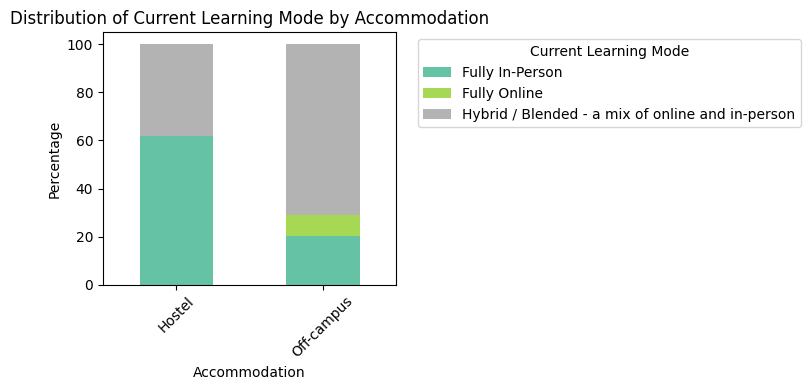

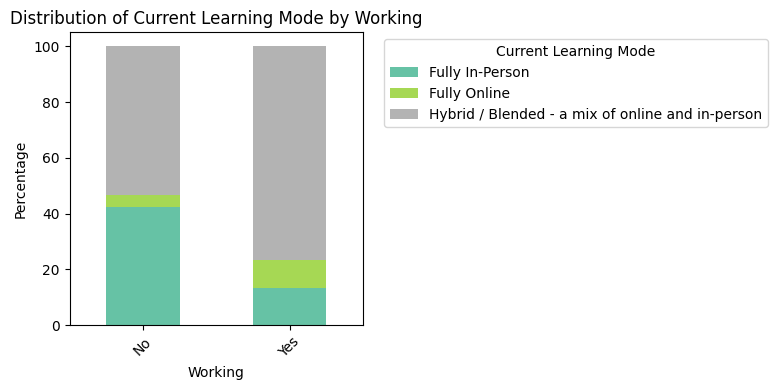

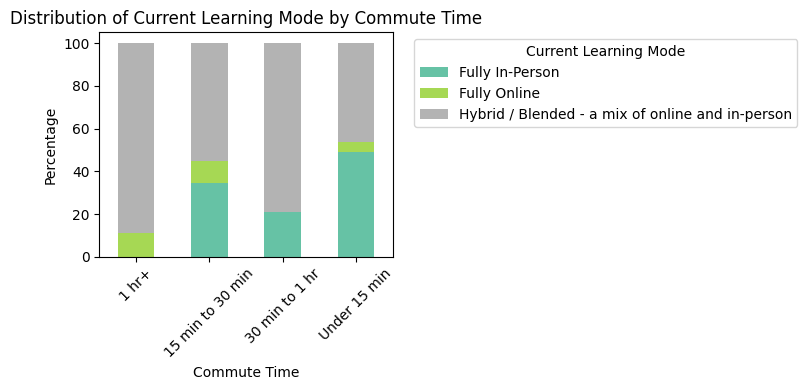

In [13]:
# Define mapping dictionaries for factors with coded numeric categories
factor_mappings = {
    'accommodation': {
        '0': 'Off-campus',
        '1': 'Hostel',
    },
    'working': {
        '0': 'Yes',
        '1': 'No',
    },
    'commute_time': {
        '0': 'Under 15 min',
        '1': '15-30 min',
        '2': '30-60 min',
        '3': '1hr+',
    }
}
categorical_factors = ['accommodation', 'working', 'commute_time']
categorical_factors = list(factor_mappings.keys())

for factor in categorical_factors:
    mapping = factor_mappings.get(factor)
    if mapping:
        df[factor] = df[factor].astype(str).map(mapping).fillna(df[factor].astype(str))
    else:
        df[factor] = df[factor].astype(str)

    ct = pd.crosstab(df[factor], df['current_mode_of_learning'], normalize='index') * 100
    ax = ct.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2', use_index=True)
    ax.set_xticklabels(ct.index, rotation=45)
    plt.title(f'Distribution of Current Learning Mode by {factor.replace("_", " ").title()}')
    plt.ylabel('Percentage')
    plt.xlabel(factor.replace('_', ' ').title())
    plt.legend(title='Current Learning Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [15]:
import seaborn as sns

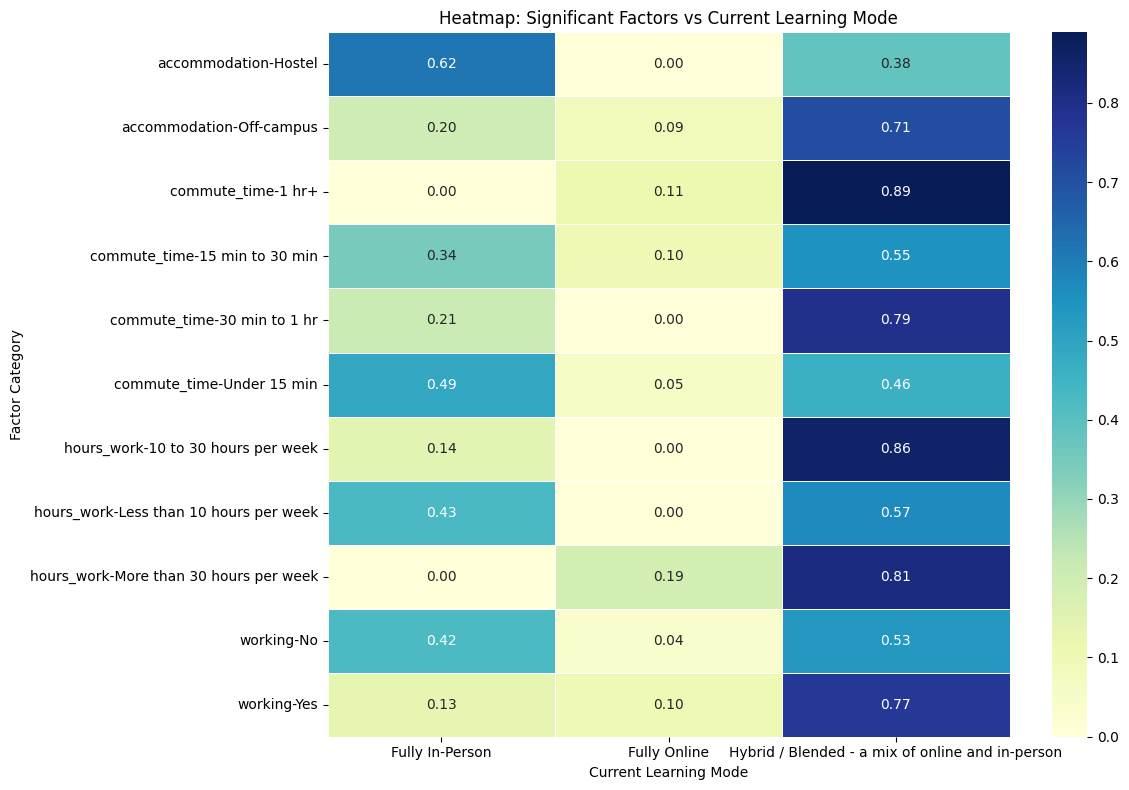

In [16]:
significant_factors = ['accommodation', 'working', 'commute_time', 'hours_work']

df_melted = pd.melt(df, id_vars=['current_mode_of_learning'], value_vars=significant_factors,
                    var_name='Factor', value_name='Category')

contingency = pd.crosstab([df_melted['Factor'], df_melted['Category']], df_melted['current_mode_of_learning'])

contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_norm, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Heatmap: Significant Factors vs Current Learning Mode')
plt.ylabel('Factor Category')
plt.xlabel('Current Learning Mode')
plt.tight_layout()
plt.show()

# Insights:



1.   Higher correlation (>0.7) have been observed bewteen ***'Accomodation-on campus & Hybrid/Blended -a mix of online and in person', 'commute time less than 15 mins & Hybrid/Blended -a mix of online and in person','commute time 30 - 60 mins & Hybrid/Blended -a mix of online and in person', 'hours work 10 - 30 hrs per week & Hybrid/Blended -a mix of online and in person', 'No working hrs per week & Hybrid/Blended -a mix of online and in person' as well as 'Working student & Hybrid/Blended -a mix of online and in person'***.

2.   Moderate correlation (0.3 ~ 0.7) have been observed between ***'accommodation-off campus & Fully in person',accommodation-off campus & Hybrid/Blended -a mix of online and in person','commute time 15 - 30 mins & Fully in person', 'commute time 15 - 30 mins & Hybrid/Blended -a mix of online and in person','commute time>60mins & Fully in person','commute time>60mins & Hybrid/Blended -a mix of online and in person','Work hour less than 10hrs & Fully in person','Work hour less than 10hrs & Hybrid/Blended -a mix of online and in person','Work hour more than 30hrs & Fully in person','Work hour more than 10hrs & Hybrid/Blended -a mix of online and in person','Students who aren't working & Fully in person' as well as 'Students who aren't working & Hybrid/Blended -a mix of online and in person'***.

